# **Melanoma Detection Assignment**

**Aim:**

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.


**Importing all the important libraries:**

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
import pathlib
import glob
import seaborn as sns

In [2]:
#Mounting google drive to access train and test data
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train")
data_dir_test = pathlib.Path('gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Test')

In [4]:
# Train & test image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**Loading the data using keras.preprocessing:**

- Using tf.keras.preprocessing.image_dataset_from_directory
- Using 80% of the images for training, and 20% for validation.
- Resize image to 180*180 pixels


In [5]:
#Define the parameters
batch_size = 32
img_height = 180
img_width = 180

In [6]:
#Preparing train set - 80% of given train image set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                           image_size = (img_height, img_width),
                                                           validation_split = 0.2,
                                                           subset = "training",
                                                           seed = 123,
                                                           color_mode = 'rgb',
                                                           batch_size = batch_size,
                                                           labels='inferred',
                                                           shuffle = True)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
#Preparing test set - 20% of given train image set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                           image_size = (img_height, img_width),
                                                           validation_split = 0.2,
                                                           subset = "validation",
                                                           seed = 123,
                                                           color_mode = 'rgb',
                                                           batch_size = batch_size,
                                                           labels='inferred',
                                                           shuffle = True)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Visualize one instance of all the nine classes present in the dataset:**

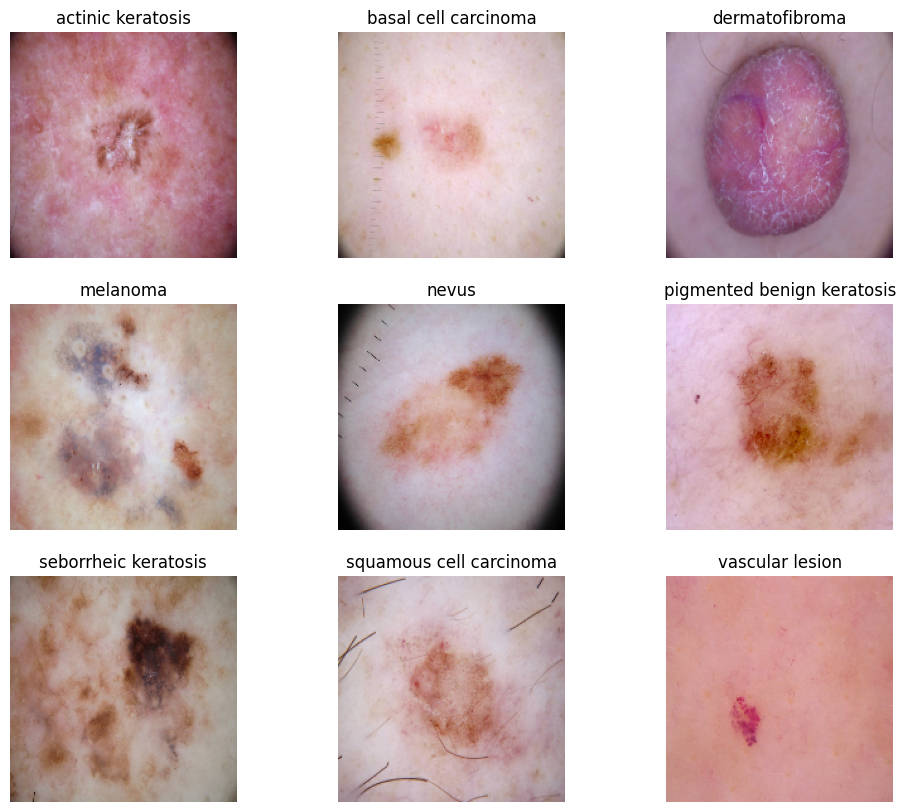

In [9]:
plt.figure(figsize=(12, 10))

for i in range (num_classes):
    filtered_ds = train_ds.filter(lambda x, l: l[0] == i)
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')
plt.show()

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Model Building & training - Building a simple model**
- Creating a simple model with 3 convolution layers
- A model with total 10 layers

In [11]:
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3))) #Normalizing pixel values to the range [0,1]
model.add(layers.Conv2D(16, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())

model.add(layers.Conv2D(32, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())

model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))

In [12]:
#Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [14]:
#Training the model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 195s 3s/step - loss: 2.0845 - accuracy: 0.2294 - val_loss: 1.9540 - val_accuracy: 0.2170
Epoch 2/20
56/56 [==============================] - 1s 14ms/step - loss: 1.7380 - accuracy: 0.3873 - val_loss: 1.6331 - val_accuracy: 0.3669
Epoch 3/20
56/56 [==============================] - 1s 14ms/step - loss: 1.6096 - accuracy: 0.4297 - val_loss: 1.4965 - val_accuracy: 0.4989
Epoch 4/20
56/56 [==============================] - 1s 15ms/step - loss: 1.4172 - accuracy: 0.5050 - val_loss: 1.4192 - val_accuracy: 0.5168
Epoch 5/20
56/56 [==============================] - 1s 14ms/step - loss: 1.3309 - accuracy: 0.5318 - val_loss: 1.3757 - val_accuracy: 0.5280
Epoch 6/20
56/56 [==============================] - 1s 13ms/step - loss: 1.2700 - accuracy: 0.5608 - val_loss: 1.6300 - val_accuracy: 0.4676
Epoch 7/20
56/56 [==============================] - 1s 12ms/step - loss: 1.2399 - accuracy: 0.5765 - val_loss: 1.4532 - val_accuracy: 0.5369
Epoch 8/20
56

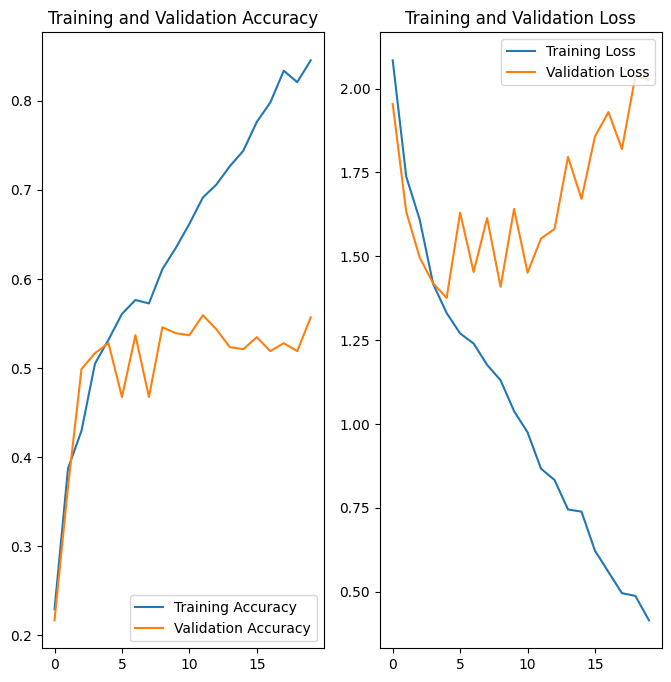

In [15]:
#Plotting the training and validation accuracy / loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The model clearly indicates overfitting with 84% training accuracy and just 55.7% validation accuracy.

This is due to lack of sufficient images (training data) as CNNs require very large number of images to learn.




**Augmentation of data to overcome overfitting:**

- Data augmentation layer will prevent the model from memorizing the train data and hence we can handle overfiting.

In [16]:
# Augmentation methods:
# - Random flipping
# - Random rotaion
# - Random zoom

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1)
])

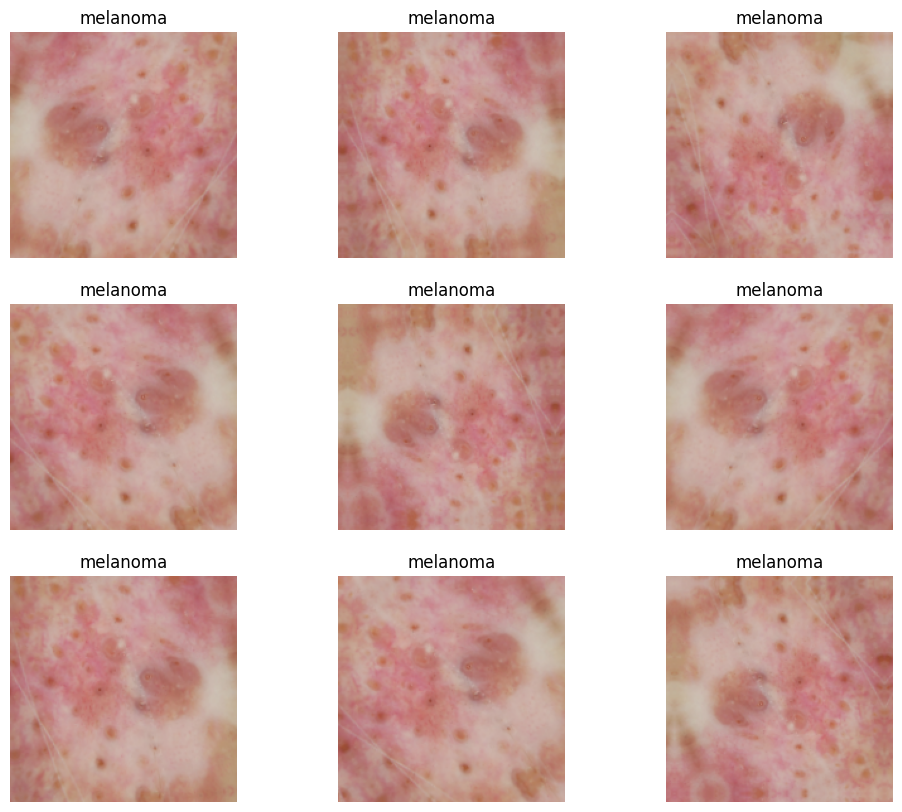

In [17]:
#VIsualizing the augmented data for one specific class
plt.figure(figsize=(12, 10))
for images, labels in train_ds.take(1):
    for i in range(num_classes):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")
plt.show()

**Model Building & training on the augmented data:**

In [18]:
model = Sequential()

model.add(data_augmentation) #Data augmentation
model.add(layers.experimental.preprocessing.Rescaling(1./255))
model.add(layers.Conv2D(16, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())

model.add(layers.Conv2D(32, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())

model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))

In [19]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [21]:
#Training the model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 18ms/step - loss: 2.0433 - accuracy: 0.2372 - val_loss: 1.8246 - val_accuracy: 0.3199
Epoch 2/20
56/56 [==============================] - 1s 14ms/step - loss: 1.7809 - accuracy: 0.3454 - val_loss: 1.6475 - val_accuracy: 0.3893
Epoch 3/20
56/56 [==============================] - 1s 13ms/step - loss: 1.6398 - accuracy: 0.4213 - val_loss: 1.5728 - val_accuracy: 0.4564
Epoch 4/20
56/56 [==============================] - 1s 14ms/step - loss: 1.5785 - accuracy: 0.4453 - val_loss: 1.5320 - val_accuracy: 0.4899
Epoch 5/20
56/56 [==============================] - 1s 15ms/step - loss: 1.4894 - accuracy: 0.4710 - val_loss: 1.4781 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 1s 16ms/step - loss: 1.4259 - accuracy: 0.4782 - val_loss: 1.4060 - val_accuracy: 0.5347
Epoch 7/20
56/56 [==============================] - 1s 18ms/step - loss: 1.3843 - accuracy: 0.5067 - val_loss: 1.4322 - val_accuracy: 0.5078
Epoch 8/20
56

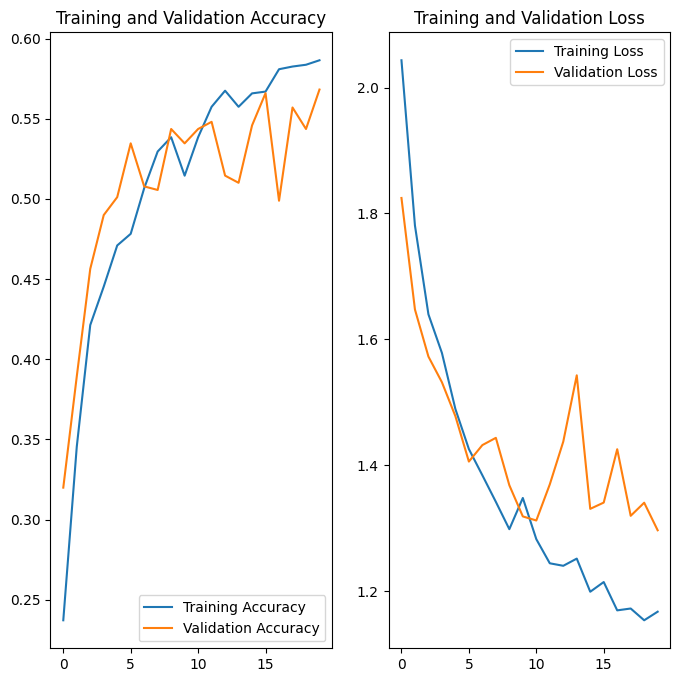

In [22]:
#Plotting the training and validation accuracy / loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings:**

- Performance improved with data augmentation
- Overfitting is handled
- Overall model performance is not so good
- The reason for lack of performance is class imbalance.







**Check the distribution of classes in training dataset:**

In [23]:
image_dict = {}
for classname in class_names:
    image_dict[classname] = len(list(data_dir_train.glob(classname+'/*.jpg')))
print(image_dict)

{'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}


In [24]:
# creating dataframe containing count of images per class
df = pd.DataFrame()
counts = list(image_dict.values())
df['class'] = class_names
df['count'] = counts
df.head(10)

,class,count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


In [26]:
#List of paths of training images
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df.head(10)

,Path,Label
0,gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detecti...,actinic keratosis
1,gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detecti...,actinic keratosis
2,gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detecti...,actinic keratosis
3,gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detecti...,actinic keratosis
4,gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detecti...,actinic keratosis
5,gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detecti...,actinic keratosis
6,gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detecti...,actinic keratosis
7,gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detecti...,actinic keratosis
8,gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detecti...,actinic keratosis
9,gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detecti...,actinic keratosis


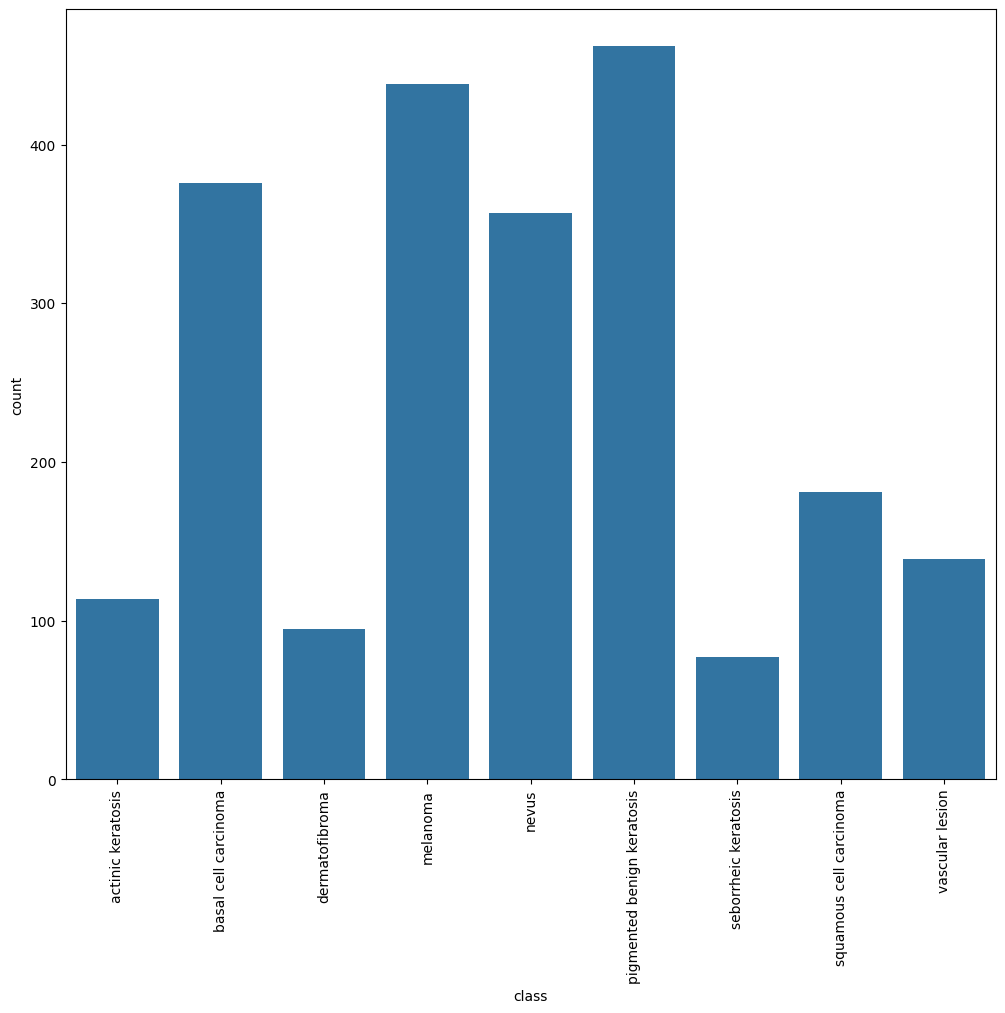

In [27]:
# Plotting bar graph to visualize for each class
plt.figure(figsize=(12, 10))
sns.barplot(x = df['class'], y = df['count'], data = df)
plt.xticks(rotation=90)
plt.show()

From the graph, the class imbalance is clearly visible.

- Seborrheic keratosis  class has the least number of samples, that is 77
- Pigmented benign keratosis and melanoma classes have maximum number of samples

**To Rectify class imbalance we can use the Augmentor library to add more images to the existing samples:**

In [28]:
!pip install Augmentor

In [29]:
#Augmentor is implemented using a pipeline
path_to_training_dataset= "gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF93E2C8E20>: 100%|██████████| 500/500 [00:20<00:00, 23.92 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF9386A30A0>: 100%|██████████| 500/500 [00:19<00:00, 25.57 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7AF9387B8220>: 100%|██████████| 500/500 [00:21<00:00, 23.04 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1016x682 at 0x7AF94271D3C0>: 100%|██████████| 500/500 [01:40<00:00,  4.99 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7AF93864D1B0>: 100%|██████████| 500/500 [01:30<00:00,  5.51 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF938501360>: 100%|██████████| 500/500 [00:20<00:00, 24.65 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7AF94275F070>: 100%|██████████| 500/500 [00:42<00:00, 11.90 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF94275CA30>: 100%|██████████| 500/500 [00:20<00:00, 24.78 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF93E7C2BC0>: 100%|██████████| 500/500 [00:23<00:00, 21.27 Samples/s]


In [30]:
#Check the image count after augmentation
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [32]:
# New path list of newly added sample images
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028314.jpg_ff0c1e90-3a5b-450c-bca2-9a25e59fed7f.jpg',
 'gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026194.jpg_0444b7be-f7d8-4b43-a75d-8c286b2e02a8.jpg',
 'gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029210.jpg_6cf0aac1-22e5-4886-8178-83ba1ddbed2a.jpg',
 'gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028517.jpg_741a0d2c-243d-4892-b430-3f01e257a400.jpg',
 'gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031993.jpg_66b2964b-c674-40e2-b282-d6958655ea51.jpg',
 'gdrive/MyDrive/COLAB_PROJECTS/Melanoma_Detection_Assignment/Train/actinic keratosis/output/actinic

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [34]:
# creating new dataframe with the newly added sample images and then merging with the existing original dataframe
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

new_df['Label'].value_counts()

<ipython-input-34-6d296f8fe234>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [35]:
#Define the parameters for new data set
batch_size = 32
img_height = 180
img_width = 180

In [36]:
#Creating train and validation image set using old and augmented samples

#Train set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [37]:
#Validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [38]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Model Building & training on the rectified class imbalance data:**

In [39]:
model = Sequential()

model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255))
model.add(layers.Conv2D(16, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())

model.add(layers.Conv2D(32, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())

model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))

In [40]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
#Training the model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 49s 77ms/step - loss: 1.8334 - accuracy: 0.2923 - val_loss: 1.4992 - val_accuracy: 0.4306
Epoch 2/20
169/169 [==============================] - 3s 17ms/step - loss: 1.4779 - accuracy: 0.4384 - val_loss: 1.3877 - val_accuracy: 0.4707
Epoch 3/20
169/169 [==============================] - 3s 18ms/step - loss: 1.3821 - accuracy: 0.4744 - val_loss: 1.3437 - val_accuracy: 0.4803
Epoch 4/20
169/169 [==============================] - 2s 14ms/step - loss: 1.3231 - accuracy: 0.4972 - val_loss: 1.3578 - val_accuracy: 0.4774
Epoch 5/20
169/169 [==============================] - 2s 14ms/step - loss: 1.2801 - accuracy: 0.5085 - val_loss: 1.2471 - val_accuracy: 0.4981
Epoch 6/20
169/169 [==============================] - 2s 14ms/step - loss: 1.2265 - accuracy: 0.5274 - val_loss: 1.2197 - val_accuracy: 0.5182
Epoch 7/20
169/169 [==============================] - 3s 18ms/step - loss: 1.2031 - accuracy: 0.5347 - val_loss: 1.1044 - val_accuracy: 0.5805
Epoch 8/2

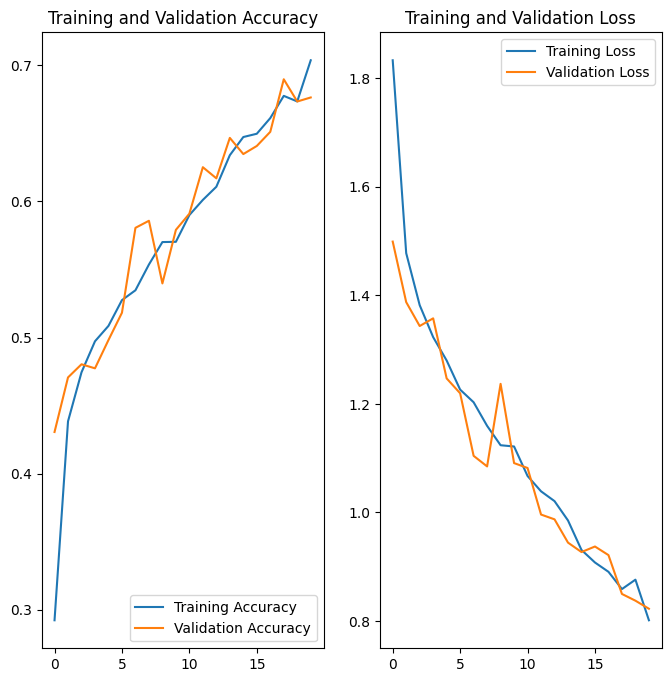

In [42]:
#Plotting the accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings:**
- We are able to overcome the class imbalance issue.
- But the overall performance is not satisfactory.

We will modify the model by adding dropouts and new convolution layers, also increase the training epochs.

In [74]:
#Add another convolution block before first max pooling and see the performance
#Also, add a dropout of 0.1
model = Sequential()

model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255))
model.add(layers.Conv2D(16, (3, 3), padding='same',activation='relu'))
model.add(layers.Conv2D(24, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())
model.add(Dropout(0.1))


model.add(layers.Conv2D(32, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())
model.add(Dropout(0.1))

model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())
model.add(Dropout(0.1))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))


In [75]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Training for 10 epochs
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
169/169 [==============================] - 7s 30ms/step - loss: 2.0361 - accuracy: 0.2302 - val_loss: 1.6911 - val_accuracy: 0.3601
Epoch 2/10
169/169 [==============================] - 4s 25ms/step - loss: 1.5460 - accuracy: 0.4024 - val_loss: 1.4092 - val_accuracy: 0.4633
Epoch 3/10
169/169 [==============================] - 4s 25ms/step - loss: 1.4562 - accuracy: 0.4407 - val_loss: 1.3515 - val_accuracy: 0.4670
Epoch 4/10
169/169 [==============================] - 5s 28ms/step - loss: 1.3747 - accuracy: 0.4774 - val_loss: 1.3576 - val_accuracy: 0.4959
Epoch 5/10
169/169 [==============================] - 4s 24ms/step - loss: 1.3554 - accuracy: 0.4889 - val_loss: 1.2689 - val_accuracy: 0.5019
Epoch 6/10
169/169 [==============================] - 4s 26ms/step - loss: 1.2878 - accuracy: 0.5104 - val_loss: 1.3292 - val_accuracy: 0.5167
Epoch 7/10
169/169 [==============================] - 5s 27ms/step - loss: 1.2571 - accuracy: 0.5237 - val_loss: 1.2180 - val_accuracy: 0.5197

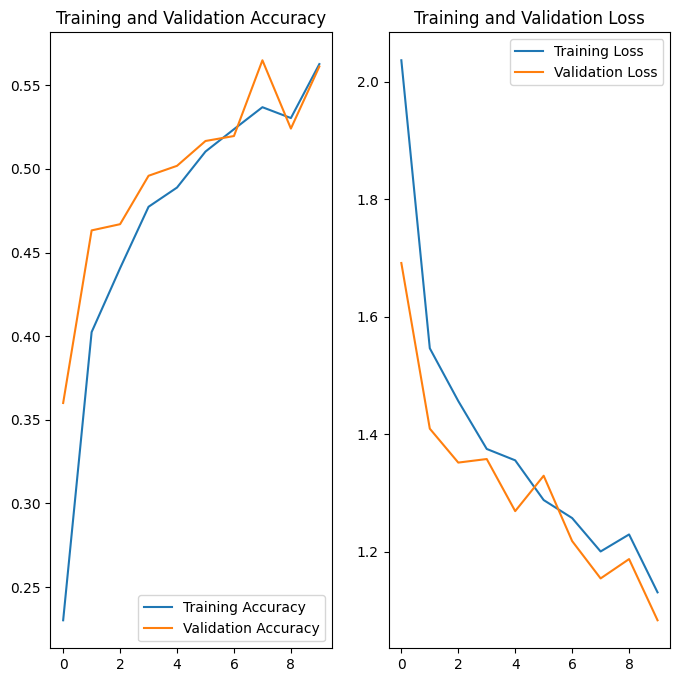

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The model is having decent performance with ust 10 epochs of training.

Let us add batch normalization and see if it improves the performance.

In [77]:
model = Sequential()

model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255))
model.add(layers.Conv2D(16, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.Conv2D(24, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add( layers.MaxPooling2D())
model.add(Dropout(0.1))


model.add(layers.Conv2D(32, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add( layers.MaxPooling2D())
model.add(Dropout(0.1))

model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add( layers.MaxPooling2D())
model.add(Dropout(0.1))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Training for 10 epochs
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
169/169 [==============================] - 10s 39ms/step - loss: 2.7508 - accuracy: 0.2704 - val_loss: 12.5615 - val_accuracy: 0.1411
Epoch 2/10
169/169 [==============================] - 6s 35ms/step - loss: 1.7753 - accuracy: 0.3420 - val_loss: 11.6579 - val_accuracy: 0.2034
Epoch 3/10
169/169 [==============================] - 6s 35ms/step - loss: 1.5822 - accuracy: 0.3926 - val_loss: 4.2449 - val_accuracy: 0.3482
Epoch 4/10
169/169 [==============================] - 6s 37ms/step - loss: 1.4760 - accuracy: 0.4358 - val_loss: 1.9219 - val_accuracy: 0.4395
Epoch 5/10
169/169 [==============================] - 6s 35ms/step - loss: 1.4203 - accuracy: 0.4471 - val_loss: 2.2925 - val_accuracy: 0.3541
Epoch 6/10
169/169 [==============================] - 6s 36ms/step - loss: 1.3604 - accuracy: 0.4642 - val_loss: 1.4638 - val_accuracy: 0.4729
Epoch 7/10
169/169 [==============================] - 6s 35ms/step - loss: 1.3091 - accuracy: 0.4863 - val_loss: 1.5315 - val_accuracy: 0.4

Batch normalization is having negative effect.

So we will finalize the model with following parameters:
- Input layer
- 4 convolution layers
- 3 pooling layers with max pooling
- 1 FC layer
- Output layer with softmax
- Dropout of 0.1 after each pooling layer

And train the model for 50 epochs:

In [79]:
model = Sequential()

model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255))
model.add(layers.Conv2D(16, (3, 3), padding='same',activation='relu'))
model.add(layers.Conv2D(24, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())
model.add(Dropout(0.1))


model.add(layers.Conv2D(32, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())
model.add(Dropout(0.1))

model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add( layers.MaxPooling2D())
model.add(Dropout(0.1))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))

In [80]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [81]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_21 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_90 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_91 (Conv2D)          (None, 180, 180, 24)      3480      
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 90, 90, 24)        0         
 ng2D)                                                           
                                                                 
 dropout_54 (Dropout)        (None, 90, 90, 24)        0         
                                                     

In [83]:
#Training for 50 epochs
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 4s 26ms/step - loss: 1.1847 - accuracy: 0.5458 - val_loss: 1.2040 - val_accuracy: 0.5353
Epoch 2/50
169/169 [==============================] - 4s 24ms/step - loss: 1.1367 - accuracy: 0.5658 - val_loss: 1.0688 - val_accuracy: 0.5917
Epoch 3/50
169/169 [==============================] - 4s 26ms/step - loss: 1.0943 - accuracy: 0.5840 - val_loss: 1.0713 - val_accuracy: 0.5939
Epoch 4/50
169/169 [==============================] - 4s 25ms/step - loss: 1.0500 - accuracy: 0.5946 - val_loss: 1.0632 - val_accuracy: 0.6058
Epoch 5/50
169/169 [==============================] - 4s 24ms/step - loss: 1.0249 - accuracy: 0.6074 - val_loss: 1.0157 - val_accuracy: 0.6043
Epoch 6/50
169/169 [==============================] - 5s 27ms/step - loss: 1.0567 - accuracy: 0.5994 - val_loss: 0.9805 - val_accuracy: 0.6050
Epoch 7/50
169/169 [==============================] - 4s 24ms/step - loss: 1.0015 - accuracy: 0.6170 - val_loss: 0.9406 - val_accuracy: 0.6422

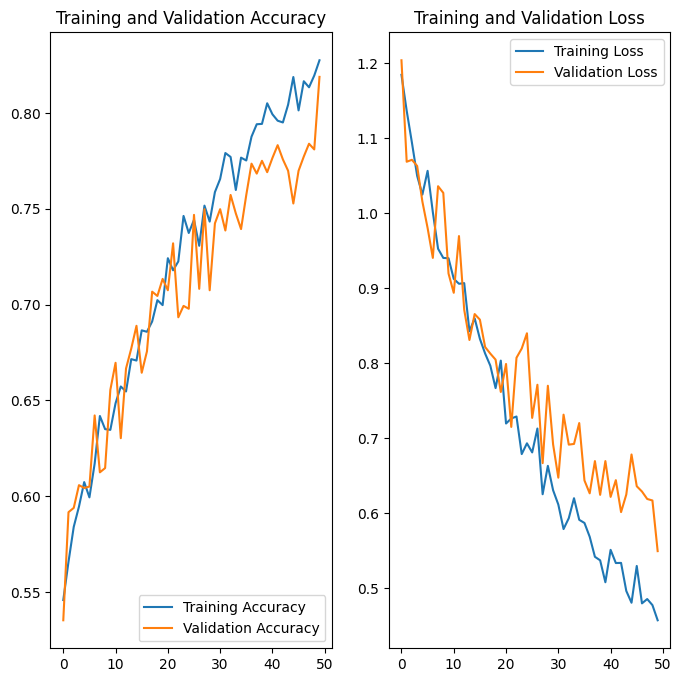

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings:**

- We got a model with 82.7% training accuracy and 81.8% validation accuracy.
- There is no over fitting
- No biasing due to class imbalance


# **Conclusion**
A CNN model is built for classification of skin diseases into 9 different classes.

While training the model, various strategies like data augmentation, handling class distribution issues are implemented to avoid over fitting and class imbalance.

Model parameters:
- Input layer
- 4 convolution layers
- 3 pooling layers with max pooling
- 1 FC layer
- Output layer with softmax
- Dropout of 0.1 after each pooling layer
- Trained the model for 50 epochs


The model with above parameters had given 82.7% training accuracy and 81.8% test accuracy.